# Лабораторна робота №3
## Дровольського Ярослава, ПЗС 1 курс магістратури

# Візуальний аналіз даних популярності статті на сайті

## Підготовчий етап

**1.** Імпортуємо необхідні бібліотеки

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2.** Завантажуємо датасет

In [115]:
df = pd.read_csv("https://raw.githubusercontent.com/YaroslavDrovolskyi/applied-application-of-neural-networks/refs/heads/main/lab3/howpop_train.csv")

**3.** Виводимо датасет

In [116]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.com/post/18284/,https://habrahabr.com/post/18285/,https://habrahabr.com/post/18286/,https://habrahabr.com/post/18291/,https://geektimes.com/post/18294/,https://habrahabr.com/post/18295/,https://geektimes.com/post/18306/,https://habrahabr.com/post/18311/,https://habrahabr.com/post/31352/,https://habrahabr.com/post/18314/,...,https://habrahabr.com/post/314068/,https://habrahabr.com/post/314078/,https://habrahabr.com/post/314040/,https://habrahabr.com/post/314082/,https://habrahabr.com/post/313960/,https://habrahabr.com/company/mailru/blog/314014/,https://geektimes.com/post/282086/,https://geektimes.com/post/282090/,https://geektimes.com/post/282092/,https://habrahabr.com/post/314088/
domain,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,habrahabr.com,geektimes.com,habrahabr.com,habrahabr.com,habrahabr.com,...,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,geektimes.com,geektimes.com,habrahabr.com
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,01/01/2008 18:19,01/01/2008 18:30,01/01/2008 18:34,02/01/2008 01:32,02/01/2008 14:34,02/01/2008 16:14,03/01/2008 12:55,03/01/2008 17:20,03/01/2008 22:54,03/01/2008 23:56,...,31/10/2016 19:53,31/10/2016 19:54,31/10/2016 20:01,31/10/2016 20:29,31/10/2016 21:08,31/10/2016 21:45,31/10/2016 22:44,31/10/2016 23:26,31/10/2016 23:52,31/10/2016 23:56
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.com,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


**4.** Видалимо стовпчики, що закінчуються на "_lognorm"

In [117]:
df = df.drop(columns=['views_lognorm', 'favs_lognorm', 'comments_lognorm'])
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.com/post/18284/,https://habrahabr.com/post/18285/,https://habrahabr.com/post/18286/,https://habrahabr.com/post/18291/,https://geektimes.com/post/18294/,https://habrahabr.com/post/18295/,https://geektimes.com/post/18306/,https://habrahabr.com/post/18311/,https://habrahabr.com/post/31352/,https://habrahabr.com/post/18314/,...,https://habrahabr.com/post/314068/,https://habrahabr.com/post/314078/,https://habrahabr.com/post/314040/,https://habrahabr.com/post/314082/,https://habrahabr.com/post/313960/,https://habrahabr.com/company/mailru/blog/314014/,https://geektimes.com/post/282086/,https://geektimes.com/post/282090/,https://geektimes.com/post/282092/,https://habrahabr.com/post/314088/
domain,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,habrahabr.com,geektimes.com,habrahabr.com,habrahabr.com,habrahabr.com,...,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,geektimes.com,geektimes.com,habrahabr.com
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,01/01/2008 18:19,01/01/2008 18:30,01/01/2008 18:34,02/01/2008 01:32,02/01/2008 14:34,02/01/2008 16:14,03/01/2008 12:55,03/01/2008 17:20,03/01/2008 22:54,03/01/2008 23:56,...,31/10/2016 19:53,31/10/2016 19:54,31/10/2016 20:01,31/10/2016 20:29,31/10/2016 21:08,31/10/2016 21:45,31/10/2016 22:44,31/10/2016 23:26,31/10/2016 23:52,31/10/2016 23:56
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.com,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


**5.** Виведемо статистичну інформацію за допомогою функції DataFrame.describe()

In [118]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


**6.** Оскільки стовпець published (час публікації) містить рядки, то перетворимо його до типу даних **datetime**, щоб ми могли працювати з цими даними як з датою/часом.

In [119]:
from datetime import datetime

df['published'] = df['published'].apply(lambda s : datetime.strptime(s, '%d/%m/%Y %H:%M'))
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.com/post/18284/,https://habrahabr.com/post/18285/,https://habrahabr.com/post/18286/,https://habrahabr.com/post/18291/,https://geektimes.com/post/18294/,https://habrahabr.com/post/18295/,https://geektimes.com/post/18306/,https://habrahabr.com/post/18311/,https://habrahabr.com/post/31352/,https://habrahabr.com/post/18314/,...,https://habrahabr.com/post/314068/,https://habrahabr.com/post/314078/,https://habrahabr.com/post/314040/,https://habrahabr.com/post/314082/,https://habrahabr.com/post/313960/,https://habrahabr.com/company/mailru/blog/314014/,https://geektimes.com/post/282086/,https://geektimes.com/post/282090/,https://geektimes.com/post/282092/,https://habrahabr.com/post/314088/
domain,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,habrahabr.com,geektimes.com,habrahabr.com,habrahabr.com,habrahabr.com,...,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,geektimes.com,geektimes.com,habrahabr.com
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2016-10-31 19:53:00,2016-10-31 19:54:00,2016-10-31 20:01:00,2016-10-31 20:29:00,2016-10-31 21:08:00,2016-10-31 21:45:00,2016-10-31 22:44:00,2016-10-31 23:26:00,2016-10-31 23:52:00,2016-10-31 23:56:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.com,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


**7.** Створимо кілька стовпців на основі даних про час публікації

In [120]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

Отримаємо такий датасет:

In [121]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.com/post/18284/,https://habrahabr.com/post/18285/,https://habrahabr.com/post/18286/,https://habrahabr.com/post/18291/,https://geektimes.com/post/18294/,https://habrahabr.com/post/18295/,https://geektimes.com/post/18306/,https://habrahabr.com/post/18311/,https://habrahabr.com/post/31352/,https://habrahabr.com/post/18314/,...,https://habrahabr.com/post/314068/,https://habrahabr.com/post/314078/,https://habrahabr.com/post/314040/,https://habrahabr.com/post/314082/,https://habrahabr.com/post/313960/,https://habrahabr.com/company/mailru/blog/314014/,https://geektimes.com/post/282086/,https://geektimes.com/post/282090/,https://geektimes.com/post/282092/,https://habrahabr.com/post/314088/
domain,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,habrahabr.com,geektimes.com,habrahabr.com,habrahabr.com,habrahabr.com,...,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,geektimes.com,geektimes.com,habrahabr.com
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2016-10-31 19:53:00,2016-10-31 19:54:00,2016-10-31 20:01:00,2016-10-31 20:29:00,2016-10-31 21:08:00,2016-10-31 21:45:00,2016-10-31 22:44:00,2016-10-31 23:26:00,2016-10-31 23:52:00,2016-10-31 23:56:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.com,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


## Завдання
У кожному пункті пропонується побудувати графік і з його допомогою відповісти на питання.

### 1.

В якому році та місяці було найбільше публікацій?
- Березень 2016
- Березень 2015
- Квітень 2015
- Квітень 2016

Для цого побудуємо графік кількості публікацій в залежності від року та місяця

Але перед цим потрібно додати колонку, в якій буде рік та місяць публікації статті.

In [122]:
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,134127,134128,134129,134130,134131,134132,134133,134134,134135,134136
url,https://habrahabr.com/post/18284/,https://habrahabr.com/post/18285/,https://habrahabr.com/post/18286/,https://habrahabr.com/post/18291/,https://geektimes.com/post/18294/,https://habrahabr.com/post/18295/,https://geektimes.com/post/18306/,https://habrahabr.com/post/18311/,https://habrahabr.com/post/31352/,https://habrahabr.com/post/18314/,...,https://habrahabr.com/post/314068/,https://habrahabr.com/post/314078/,https://habrahabr.com/post/314040/,https://habrahabr.com/post/314082/,https://habrahabr.com/post/313960/,https://habrahabr.com/company/mailru/blog/314014/,https://geektimes.com/post/282086/,https://geektimes.com/post/282090/,https://geektimes.com/post/282092/,https://habrahabr.com/post/314088/
domain,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,habrahabr.com,geektimes.com,habrahabr.com,habrahabr.com,habrahabr.com,...,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,habrahabr.com,geektimes.com,geektimes.com,geektimes.com,habrahabr.com
post_id,18284,18285,18286,18291,18294,18295,18306,18311,31352,18314,...,314068,314078,314040,314082,313960,314014,282086,282090,282092,314088
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00,2008-01-02 16:14:00,2008-01-03 12:55:00,2008-01-03 17:20:00,2008-01-03 22:54:00,2008-01-03 23:56:00,...,2016-10-31 19:53:00,2016-10-31 19:54:00,2016-10-31 20:01:00,2016-10-31 20:29:00,2016-10-31 21:08:00,2016-10-31 21:45:00,2016-10-31 22:44:00,2016-10-31 23:26:00,2016-10-31 23:52:00,2016-10-31 23:56:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo,@lvea,@abbasov,@Andrey,@kvladimir,@lvea,...,@plan_A,@semen_grinshtein,@MACROSCOP,@alexeev_n,@Nuteralie,NaN,@marks,@Shapelez,@ragequit,@Mgrin
flow,develop,design,design,design,NaN,develop,NaN,misc,develop,develop,...,develop,management,develop,management,management,develop,NaN,NaN,NaN,develop
polling,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
content_len,4305,7344,8431,5662,3706,3171,435,3291,1953,3712,...,13905,13832,8493,4529,7104,56033,5504,2883,5735,9359
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone,Mobile2.0 Всеобщая доступность,Modbook в действии,В чем суть проекта Vladelia.com,Подтверждено: Wikia Search запускается в понед...,Mobile 2.0 Выбор предпочтительного способа связи,...,ASO оптимизация. Составление семантического яд...,Как Windows NT стала «убийцей» Novell NetWare OS,Как найти вектор развития программного продукт...,Почему в очередной раз проваливается внедрение...,Большое количество людей в опенспейсе мешает с...,Парсинг JSON — это минное поле,Заработала система раннего предупреждения НАСА...,Арзамасский городской суд постановил заблокиро...,Медиа-коммуникационный союз планирует внести в...,mgr-forms-react: Простой компонент для простей...
comments,0,1,47,102,230,22,10,64,23,6,...,16,31,12,30,82,58,52,16,47,4


<ipython-input-123-fcf74c7f8870>:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(data=df[(df.year_month == '2016-03') | (df.year_month == '2015-03') |


[Text(0.5, 1.0, 'Posts'), Text(0.5, 0, 'Month'), Text(0, 0.5, 'Count')]

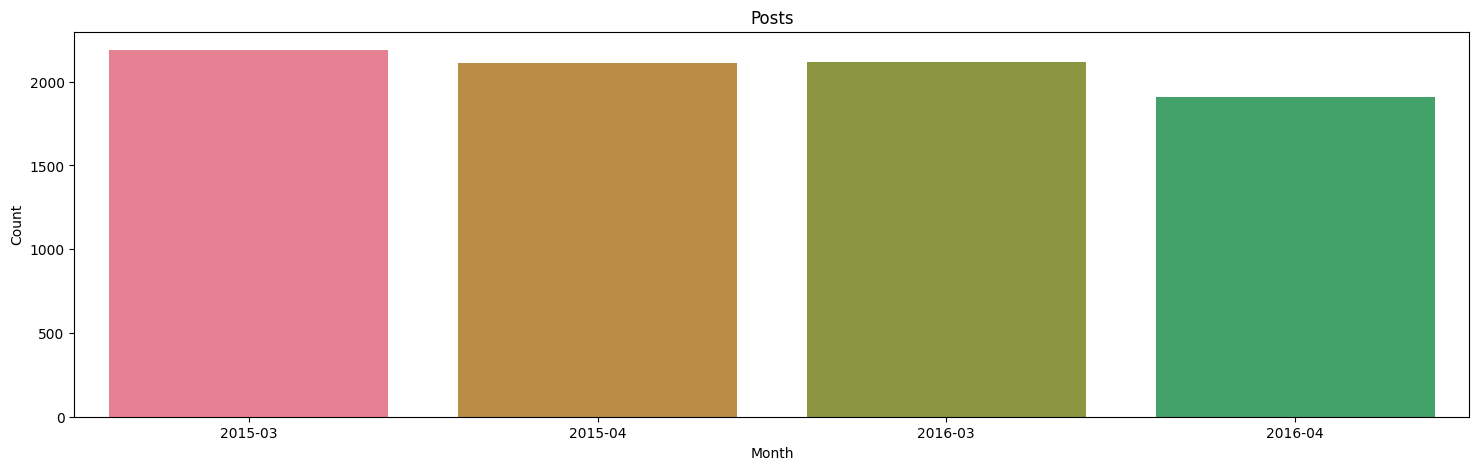

In [123]:
plt.figure(figsize=(18,5))

sns.countplot(data=df[(df.year_month == '2016-03') | (df.year_month == '2015-03') |
                      (df.year_month == '2016-04') | (df.year_month == '2015-04')],
              x="year_month",
              palette=sns.color_palette("husl", 8), hue="year_month",
              legend=False).set(title="Posts", xlabel="Month", ylabel="Count")

Як видно із графіка, серед наведених варіантів, саме у **березні 2015 року** було найбільше публікацій.

### 2.

Проаналізуйте публікації в місяці з попереднього питання. Оберіть один або кілька
варіантів.
- Один або кілька днів сильно виділяються із загальної картини
- На Хабрі (habrahabr.com) завжди більше статей, ніж на Гіктаймсі (geektimes.com)
- По суботах на Гіктаймсі та Хабрі публікують приблизно однакове число статей

***Підказка:*** *побудуйте графік залежності числа публікацій від дня; використовуйте параметр hue.*

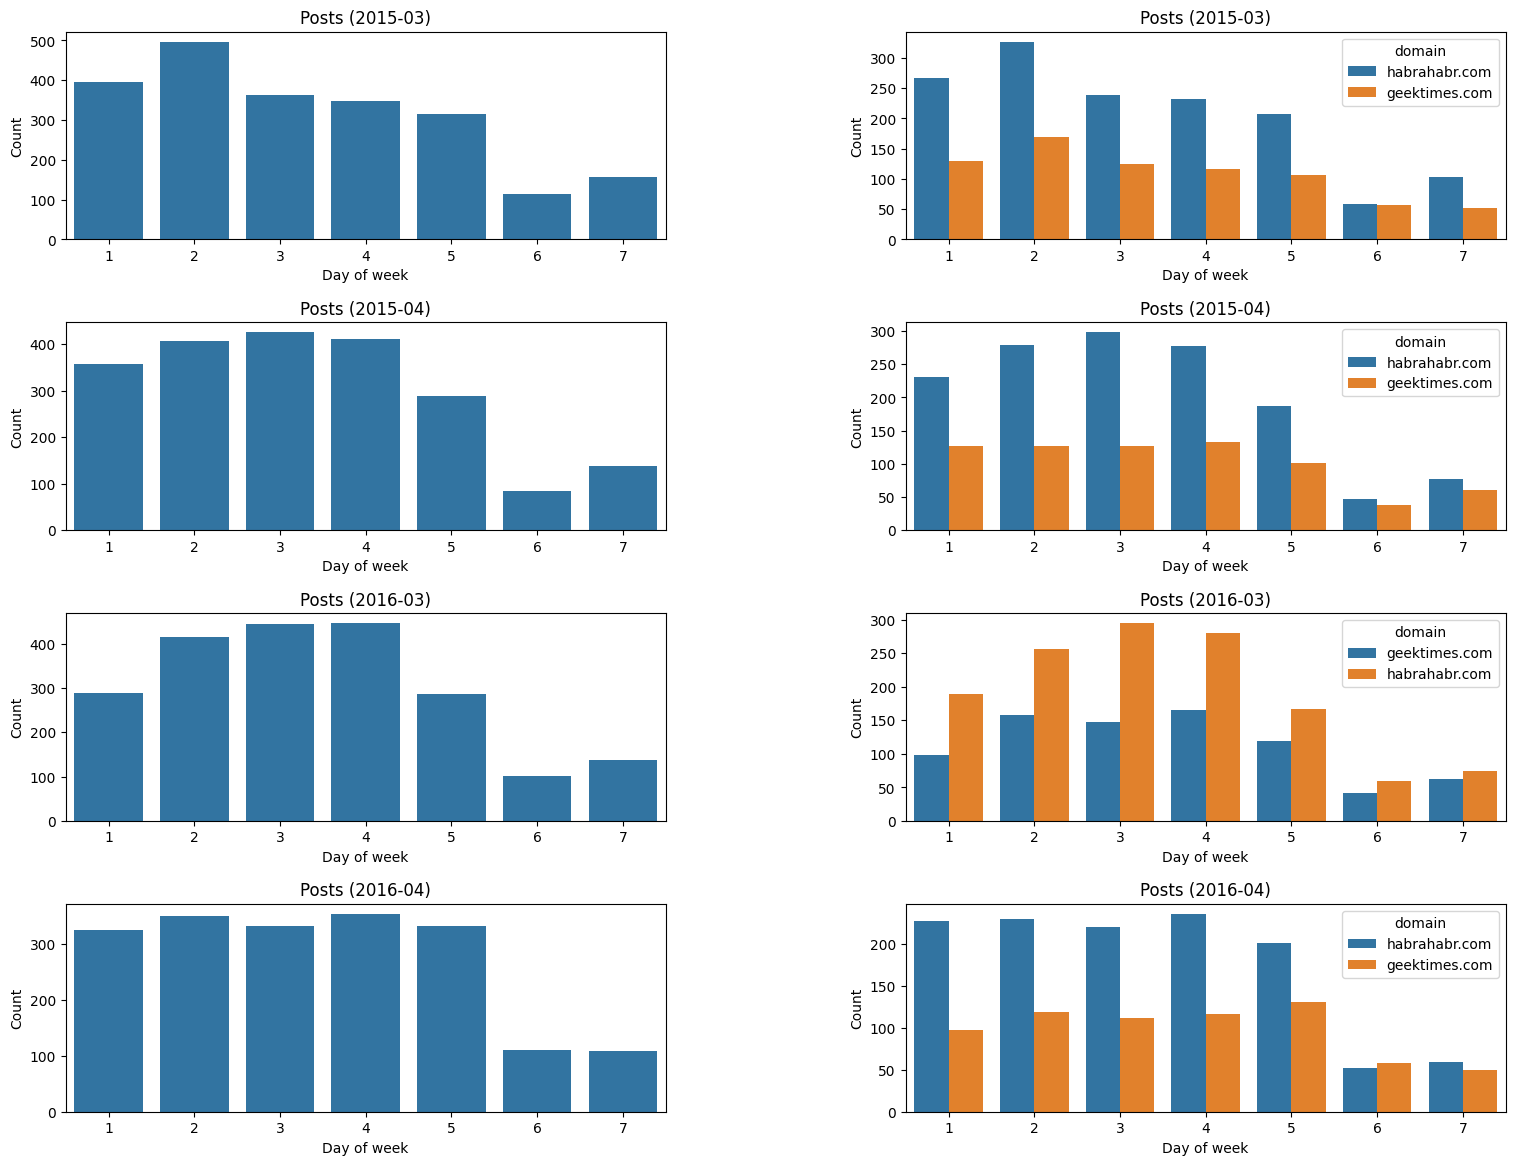

In [124]:
plt.figure(figsize=(18,12))

plt.subplot(4,2,1)
sns.countplot(data=df[(df.year_month == '2015-03')],
              x="dayofweek").set(title="Posts (2015-03)", xlabel="Day of week", ylabel="Count")
plt.subplot(4,2,2)
sns.countplot(data=df[(df.year_month == '2015-03')],
              x="dayofweek",
              hue="domain").set(title="Posts (2015-03)", xlabel="Day of week", ylabel="Count")


plt.subplot(4,2,3)
sns.countplot(data=df[(df.year_month == '2015-04')],
              x="dayofweek").set(title="Posts (2015-04)", xlabel="Day of week", ylabel="Count")
plt.subplot(4,2,4)
sns.countplot(data=df[(df.year_month == '2015-04')],
              x="dayofweek",
              hue="domain").set(title="Posts (2015-04)", xlabel="Day of week", ylabel="Count")


plt.subplot(4,2,5)
sns.countplot(data=df[(df.year_month == '2016-03')],
              x="dayofweek").set(title="Posts (2016-03)", xlabel="Day of week", ylabel="Count")
plt.subplot(4,2,6)
sns.countplot(data=df[(df.year_month == '2016-03')],
              x="dayofweek",
              hue="domain").set(title="Posts (2016-03)", xlabel="Day of week", ylabel="Count")


plt.subplot(4,2,7)
sns.countplot(data=df[(df.year_month == '2016-04')],
              x="dayofweek").set(title="Posts (2016-04)", xlabel="Day of week", ylabel="Count")
plt.subplot(4,2,8)
sns.countplot(data=df[(df.year_month == '2016-04')],
              x="dayofweek",
              hue="domain").set(title="Posts (2016-04)", xlabel="Day of week", ylabel="Count")


# margins between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.4)


plt.show()

- З графіків видно, що із загальної картини завжди сильно виділяються субота та неділя - в ці дні публікується мало статей, порівняно із рештою днів.
- З графіків видно, що, ОКРІМ СУБОТ КВІТНЯ 2016 РОКУ, На Хабрі (habrahabr.com) завжди в кожен день тижня вибраних місяців виходить більше статей, ніж на Гіктаймсі (geektimes.com)
- На графіках видно, що майже завжди по суботах та неділях стовпчики Хабру та Гіктаймс  приблизно однакової висоти. ПРОТЕ це не так в неділі березня 2015 року та суботи березня 2016 року, коли на Хабрі вийшло приблизно в два та 1.5 рази відповідно більше статеЙ, ніж на Гіктаймсі.



### 3.

Коли найкраще опублікувати статтю? Оберіть один або кілька варіантів.
- Найбільше переглядів набирають статті, опубліковані о 12 годині дня
- В опублікованих о 10 ранку постів найбільше коментарів
- Найбільше переглядів набирають статті, опубліковані о 6 годині ранку
- Максимальна кількість коментарів на Гіктаймсі набрала стаття, опублікована о 9
годині вечора
- На Хабрі денні статті коментують частіше, ніж вечірні

Для відповіді на питання побудуємо такі графіки:
- кількості переглядів в залежності від години публікації
- кількості коментарів в залежності від години публікації
- кількості коментарів на Хабрі в залежності від години публікації
- кількості коментарів на Гіктаймсі в залежності від години публікації

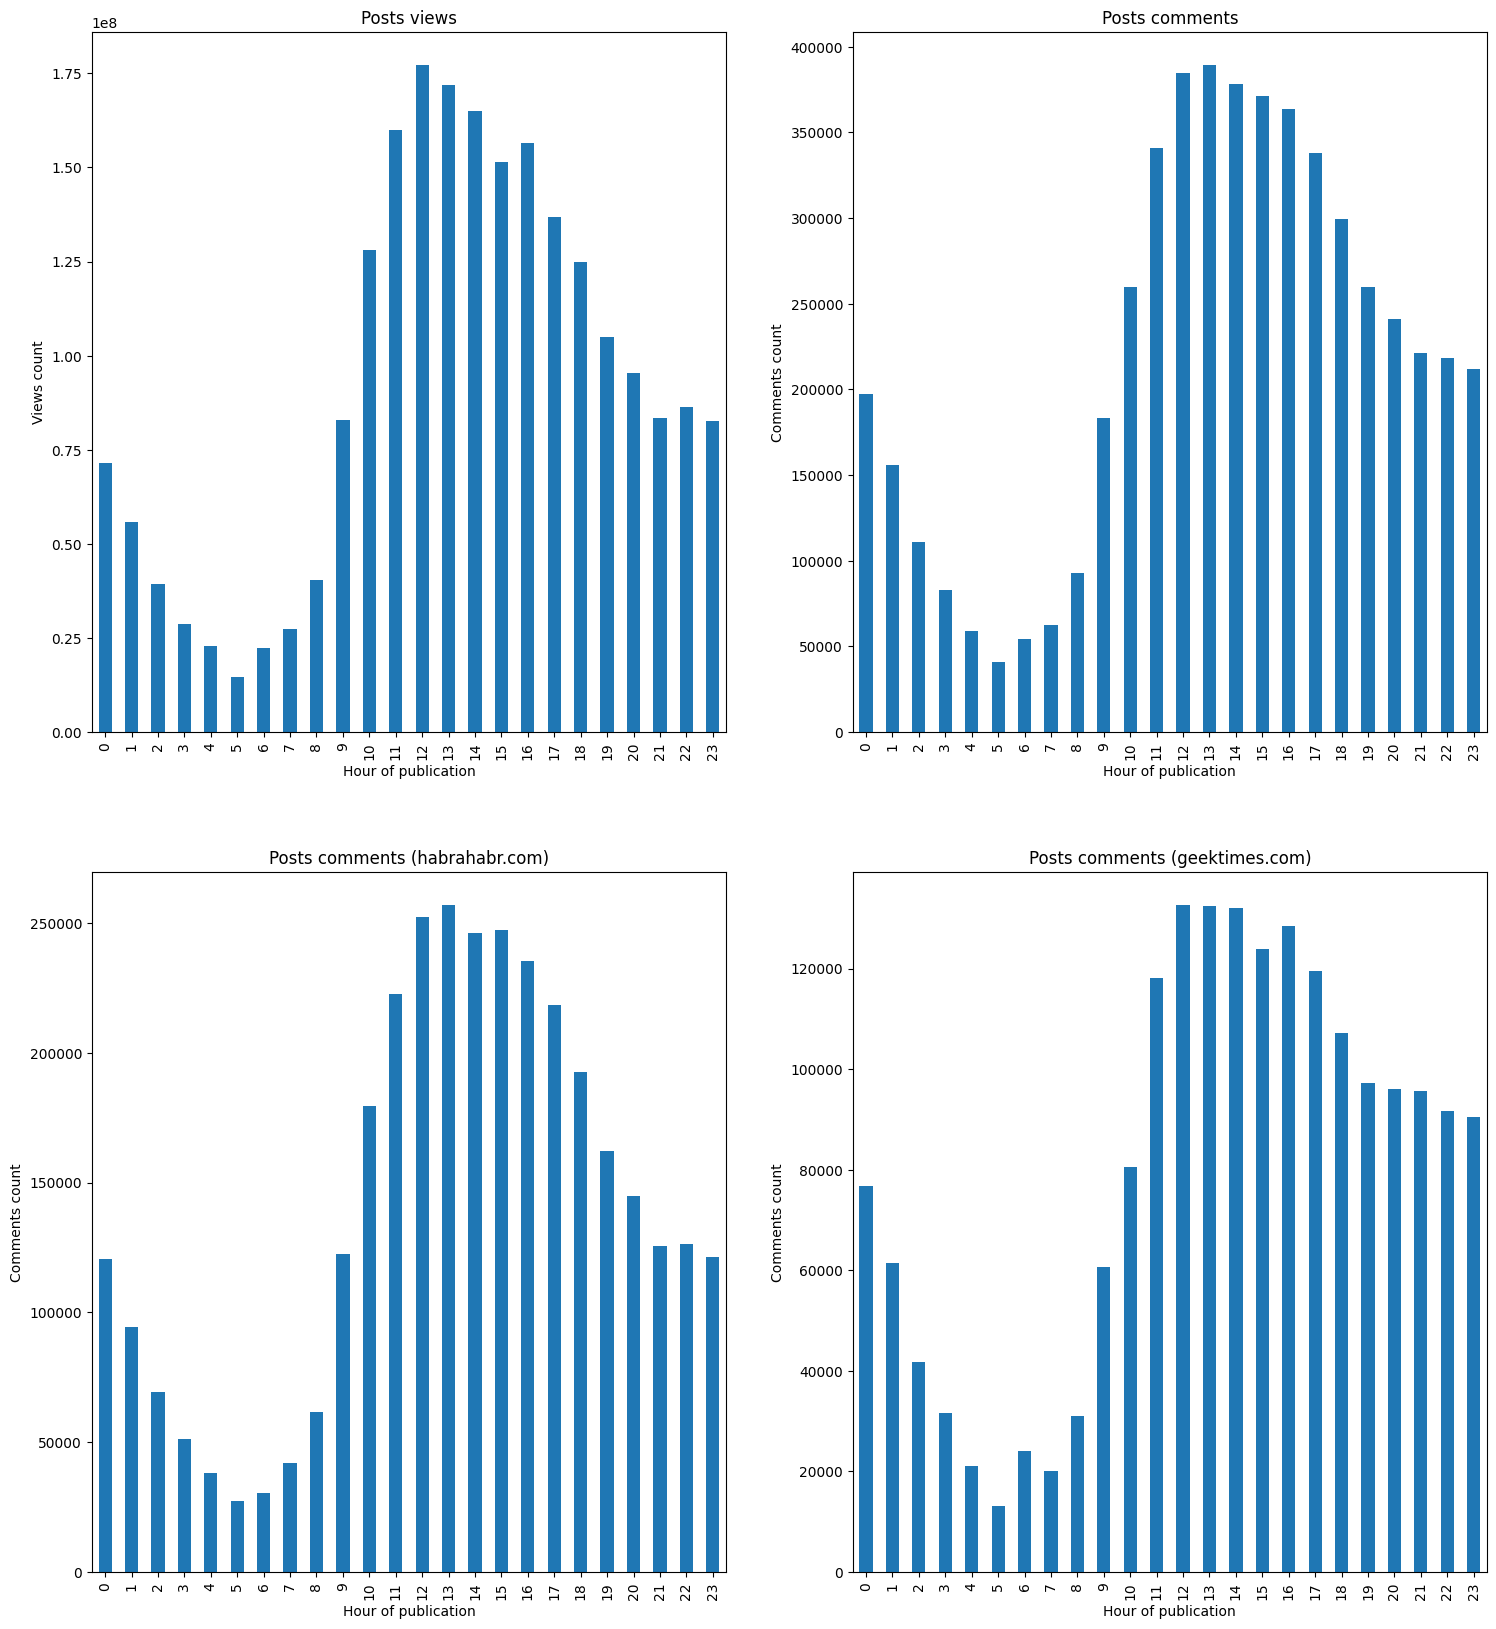

In [125]:
plt.figure(figsize=(18,20))


df_views_by_hour = df.groupby('hour')['views'].sum()
plt.subplot(2,2,1)
df_views_by_hour.plot(kind='bar')
plt.title("Posts views")
plt.xlabel("Hour of publication")
plt.ylabel("Views count")


df_comments_by_hour = df.groupby('hour')['comments'].sum()
plt.subplot(2,2,2)
df_comments_by_hour.plot(kind='bar')
plt.title("Posts comments")
plt.xlabel("Hour of publication")
plt.ylabel("Comments count")


df_comments_by_hour_habr = df[df.domain=='habrahabr.com'].groupby('hour')['comments'].sum()
plt.subplot(2,2,3)
df_comments_by_hour_habr.plot(kind='bar')
plt.title("Posts comments (habrahabr.com)")
plt.xlabel("Hour of publication")
plt.ylabel("Comments count")

df_comments_by_hour_geektimes = df[df.domain=='geektimes.com'].groupby('hour')['comments'].sum()
plt.subplot(2,2,4)
df_comments_by_hour_geektimes.plot(kind='bar')
plt.title("Posts comments (geektimes.com)")
plt.xlabel("Hour of publication")
plt.ylabel("Comments count")


plt.show()

- Як бачимо з першого графіка, найбільше переглядів набирають статті, опубліковані о 12 годині дня. Оскільки сума переглядів статей, опублікованих о 12 годині найбільша, бо відповідний стовпчик найвищий
- Як бачимо з другого графіка, найбільше коментарів мають статті, опубліковані о 13 годині дня. Оскільки сума кількості коментарів статей, опублікованих о 13 годині найбільша, бо відповідний стовпчик найвищий
- На Хабрі денні статті коментують частіше, ніж вечірні. З графіків видно, що сума кількості коментарів статей, які опубліковані в денні години (візьмемо умовно 06:00-18:00) ЯВНО БІЛЬША, ніж статей опублікований  у вечірний час
- Максимальну суму кількості коментарів на Гіктаймсі набрали НЕ статті, опубліковані о 9 годині вечора

### 4.

Кого з топ-20 авторів найчастіше мінусують?
- @Mordatyj
- @Mithgol
- @alizar
- @ilya42

Для вищенаведених авторів побудуємо графік кількості поставлених мінусів їхнім статтям

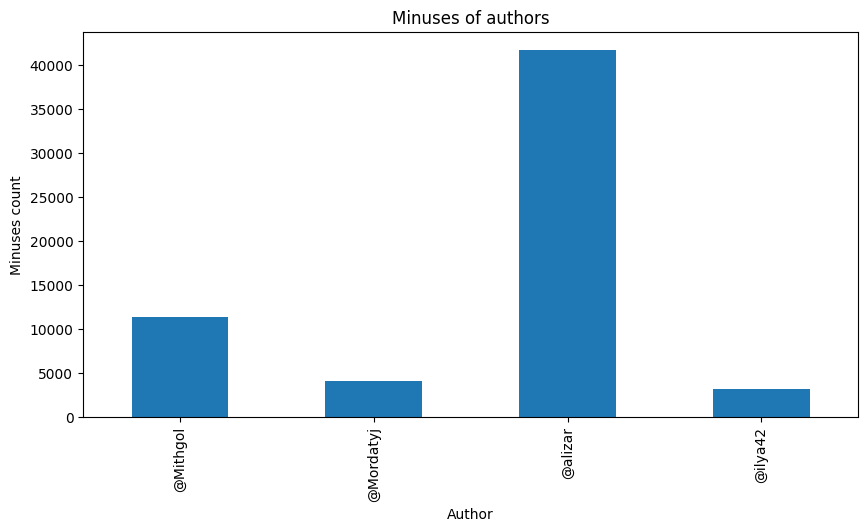

In [126]:
plt.figure(figsize=(10,5))

df_minuses_by_author = df[(df.author == '@Mordatyj') |
                     (df.author == '@Mithgol') |
                     (df.author == '@alizar') |
                     (df.author == '@ilya42')].groupby('author')['votes_minus'].sum()

df_minuses_by_author.plot(kind='bar')
plt.title("Minuses of authors")
plt.xlabel("Author")
plt.ylabel("Minuses count")

plt.show()

З графіка видно, що найчастіше серед наведенх авторів мінусують автора @alizar, оскільки сума кількості мінусів під всіма його статтями значно більша, ніж у решти авторів.

### 5.
Порівняйте суботи і понеділки. Чи правда, що по суботах автори пишуть в основному
вдень, а по понеділках – в основному ввечері?

Побудуємо такі графіки:
- графік залежності кількості публікацій від часу публікації у суботу
- графік залежності кількості публікацій від часу публікації у понеділок

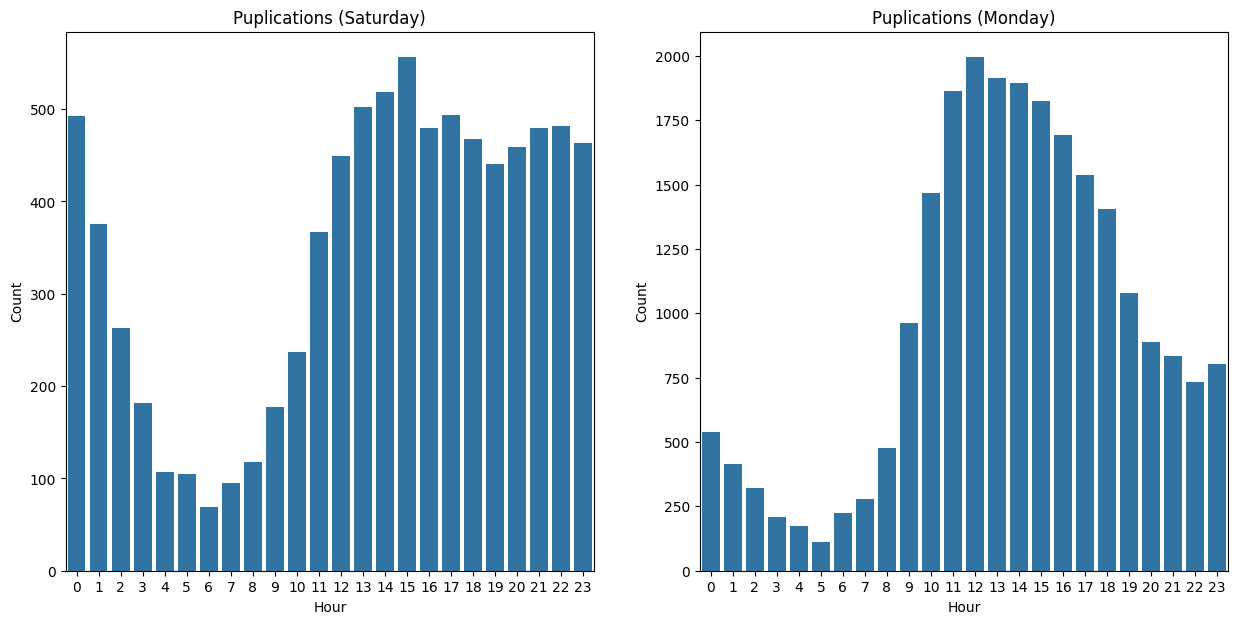

In [127]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(data=df[(df.dayofweek == 6)],
              x="hour").set(title="Puplications (Saturday)", xlabel="Hour", ylabel="Count")

plt.subplot(1,2,2)
sns.countplot(data=df[(df.dayofweek == 1)],
              x="hour").set(title="Puplications (Monday)", xlabel="Hour", ylabel="Count")

plt.show()

Як бачимо з графіків, найбільша кількість публікацій у суботу припадає в період 12:00-23:00.
А найбільша кількість публікацій в понеділок - в період 10:00-18:00.

Тому з наведеним твердженням НЕ можна погодитись, оскільки в суботу в основному автори пишуть вдень ТА ввечері; а в понеділок в основному пишуть вдень.
